# notebook to model on just key features for potential use in an input model only #

In [37]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# import scaler and tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




In [38]:
# read the contents of a zip file
import zipfile
with zipfile.ZipFile("hrdata.zip","r") as zip_ref:
    zip_ref.extractall("datafiles")

In [39]:
# read the contents of a csv file
df = pd.read_csv(r"datafiles\HR.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [40]:
# review the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [41]:
# drop the rows with null values
df_drop = df.dropna()
# df_drop.info()
df = df_drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   promotion_last_5years  15000 non-null  int64  
 8   department             15000 non-null  object 
 9   salary                 15000 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [42]:
df = df.drop(['department', 'promotion_last_5years'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   salary                 15000 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [43]:
df_dummies = pd.get_dummies(df, columns=["salary"])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 15001
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15000 non-null  float64
 2   number_project         15000 non-null  int64  
 3   average_monthly_hours  15000 non-null  int64  
 4   time_spend_company     15000 non-null  int64  
 5   Work_accident          15000 non-null  int64  
 6   left                   15000 non-null  int64  
 7   salary_high            15000 non-null  uint8  
 8   salary_low             15000 non-null  uint8  
 9   salary_medium          15000 non-null  uint8  
 10  salary_nme             15000 non-null  uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 996.1 KB


In [44]:
# remove random 1000 rows from df_dummies and copy to a new dataframe called df_dummies_later
df_dummies_later = df_dummies.sample(n=1000)


# df_dummies_later = df_dummies.drop(df_dummies.index[1000:])
df_dummies_later.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4992 to 4617
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     1000 non-null   float64
 1   last_evaluation        1000 non-null   float64
 2   number_project         1000 non-null   int64  
 3   average_monthly_hours  1000 non-null   int64  
 4   time_spend_company     1000 non-null   int64  
 5   Work_accident          1000 non-null   int64  
 6   left                   1000 non-null   int64  
 7   salary_high            1000 non-null   uint8  
 8   salary_low             1000 non-null   uint8  
 9   salary_medium          1000 non-null   uint8  
 10  salary_nme             1000 non-null   uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 66.4 KB


In [45]:
# create a loop to delete each row in the df_dummies_later dataframe from the df_dummies dataframe
for index, row in df_dummies_later.iterrows():
    df_dummies = df_dummies.drop(index)


# for i in range(1000):
#     df_dummies = df_dummies.drop(df_dummies.index[0])
    

In [46]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 0 to 15001
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14000 non-null  float64
 1   last_evaluation        14000 non-null  float64
 2   number_project         14000 non-null  int64  
 3   average_monthly_hours  14000 non-null  int64  
 4   time_spend_company     14000 non-null  int64  
 5   Work_accident          14000 non-null  int64  
 6   left                   14000 non-null  int64  
 7   salary_high            14000 non-null  uint8  
 8   salary_low             14000 non-null  uint8  
 9   salary_medium          14000 non-null  uint8  
 10  salary_nme             14000 non-null  uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 929.7 KB


In [47]:
# create and split the training and test sets
X = df_dummies.drop(['left'], axis=1)
y = df_dummies['left']
print("Shape: ", X.shape, y.shape)

Shape:  (14000, 10) (14000,)


### create the testing and training data ###

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear and Logicstic Regression on on Non Scaled Data ###

In [49]:
# create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.2035000135841315
Testing Data Score: 0.2367430418645562


In [51]:
# create the regresion model
classifier = LogisticRegression()
classifier

LogisticRegression()

In [52]:
# fit the model
classifier.fit(X_train, y_train)

C:\Users\benjy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# print the scores
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7857142857142857
Testing Data Score: 0.8042857142857143


In [54]:
# create a confusion matrix to demonstrate accuracy of logistic regression
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[2003,  134],
       [ 414,  249]], dtype=int64)

In [55]:
# show math behind accuracy
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
accuracy = (tp + tn) / (tp + fp + tn + fn) # (111 + 128) / (111 + 5 + 128 + 6)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8042857142857143


In [56]:
# reporting on classifcation report performance
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2137
           1       0.65      0.38      0.48       663

    accuracy                           0.80      2800
   macro avg       0.74      0.66      0.68      2800
weighted avg       0.79      0.80      0.78      2800



#### Scaling the data ####

In [57]:
# scaling the X Data by using the standardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
# create the linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [59]:
# print the scores
print(f"Scaled Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {lr.score(X_test_scaled, y_test)}")

Scaled Training Data Score: 0.2035000135841315
Scaled Testing Data Score: 0.23686078067874838


In [60]:
# create the logiistic regresion model with e scaled data
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [61]:
# print the scores
print(f"Scaled Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Scaled Training Data Score: 0.7841071428571429
Scaled Testing Data Score: 0.8003571428571429


### KNN on non scaled and scaled data ###

In [62]:
# create a KNN model using the  data
# import scaler and tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# import k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    print(f"K: {k}, Train: {train_score}, Test: {test_score}")

K: 1, Train: 1.0, Test: 0.9660714285714286
K: 3, Train: 0.9713392857142857, Test: 0.9528571428571428
K: 5, Train: 0.9585714285714285, Test: 0.9492857142857143
K: 7, Train: 0.9511607142857142, Test: 0.9507142857142857
K: 9, Train: 0.9476785714285715, Test: 0.9496428571428571
K: 11, Train: 0.9447321428571429, Test: 0.945
K: 13, Train: 0.9438392857142858, Test: 0.945
K: 15, Train: 0.9414285714285714, Test: 0.9421428571428572
K: 17, Train: 0.9405357142857143, Test: 0.94
K: 19, Train: 0.938125, Test: 0.9378571428571428


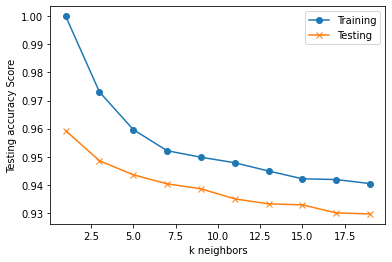

In [28]:
# plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend(["Training", "Testing"])
plt.show()

In [29]:
# Use KNN model on the scaled data
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
scaled_train_scores = []
scaled_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scaled_train_score = knn.score(X_train_scaled, y_train)
    scaled_test_score = knn.score(X_test_scaled, y_test)
    scaled_train_scores.append(knn.score(X_train_scaled, y_train))
    scaled_test_scores.append(knn.score(X_test_scaled, y_test))
    print(f"K: {k}, Scaled Train: {scaled_train_score}, Scaled Test: {scaled_test_score}")

K: 1, Scaled Train: 1.0, Scaled Test: 0.9746428571428571
K: 3, Scaled Train: 0.9822321428571429, Scaled Test: 0.9632142857142857
K: 5, Scaled Train: 0.9746428571428571, Scaled Test: 0.9582142857142857
K: 7, Scaled Train: 0.9713392857142857, Scaled Test: 0.9607142857142857
K: 9, Scaled Train: 0.9672321428571429, Scaled Test: 0.9596428571428571
K: 11, Scaled Train: 0.9657142857142857, Scaled Test: 0.9578571428571429
K: 13, Scaled Train: 0.9639285714285715, Scaled Test: 0.9585714285714285
K: 15, Scaled Train: 0.9622321428571429, Scaled Test: 0.9578571428571429
K: 17, Scaled Train: 0.9602678571428571, Scaled Test: 0.9571428571428572
K: 19, Scaled Train: 0.9595535714285715, Scaled Test: 0.9542857142857143


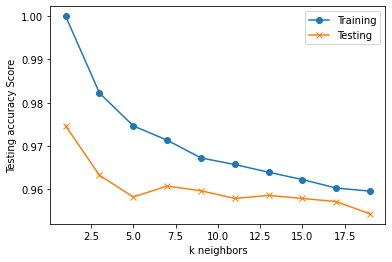

In [30]:
# plot the scaled results
plt.plot(range(1, 20, 2), scaled_train_scores, marker='o')
plt.plot(range(1, 20, 2), scaled_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend(["Training", "Testing"])
plt.show()

In [31]:
# use a decision tree model to predict the data
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
# print the scores
print(f"Training Data Score: {dtc.score(X_train, y_train)}")
print(f"Testing Data Score: {dtc.score(X_test, y_test)}")



Training Data Score: 1.0
Testing Data Score: 0.9767857142857143


In [32]:
# use a decision tree model to predict the data with scaled data
# import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)
# print the scores
print(f"Scaled Training Data Score: {dtc.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {dtc.score(X_test_scaled, y_test)}")



Scaled Training Data Score: 1.0
Scaled Testing Data Score: 0.9771428571428571


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train, y_train)
# print the scores
print(f"Training Data Score: {rfc.score(X_train, y_train)}")
print(f"Testing Data Score: {rfc.score(X_test, y_test)}")



Training Data Score: 0.9997321428571428
Testing Data Score: 0.9892857142857143


In [34]:
rfc = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
# print the scores
print(f"Scaled Training Data Score: {rfc.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {rfc.score(X_test_scaled, y_test)}")

Scaled Training Data Score: 0.9997321428571428
Scaled Testing Data Score: 0.9892857142857143


In [35]:
# create test sets
X = df_dummies_later.drop(['left'], axis=1)
y = df_dummies_later['left']
print("Shape: ", X.shape, y.shape)

Shape:  (1000, 10) (1000,)


In [36]:
# use the df_dummies_later data in the randomforestclassifier model
rfc = RandomForestClassifier(random_state=1, n_estimators=50).fit(X, y)
print(f"Testing Data Score: {rfc.score(X, y)}")

Testing Data Score: 0.999
